In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

## - Exercici 1

Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.Tingues en compte que prèviament et caldrà preparar el dataset.

In [2]:
df = pd.read_csv("Publicacions Facebook Thailandia.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(["Column1", "Column2","Column3", "Column4", "status_id"], axis=1)

In [5]:
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       7050 non-null   object
 1   status_published  7050 non-null   object
 2   num_reactions     7050 non-null   int64 
 3   num_comments      7050 non-null   int64 
 4   num_shares        7050 non-null   int64 
 5   num_likes         7050 non-null   int64 
 6   num_loves         7050 non-null   int64 
 7   num_wows          7050 non-null   int64 
 8   num_hahas         7050 non-null   int64 
 9   num_sads          7050 non-null   int64 
 10  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 606.0+ KB


In [7]:
df['status_published'] = pd.to_datetime(df['status_published'])

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.117163,462.625309,0.0,17.0,59.5,219.00,4710.0
num_comments,7050.0,224.356028,889.636820,0.0,0.0,4.0,23.00,20990.0
num_shares,7050.0,40.022553,131.599965,0.0,0.0,0.0,4.00,3424.0
num_likes,7050.0,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,12.728652,39.972930,0.0,0.0,0.0,3.00,657.0
num_wows,7050.0,1.289362,8.719650,0.0,0.0,0.0,0.00,278.0
num_hahas,7050.0,0.696454,3.957183,0.0,0.0,0.0,0.00,157.0
num_sads,7050.0,0.243688,1.597156,0.0,0.0,0.0,0.00,51.0
num_angrys,7050.0,0.113191,0.726812,0.0,0.0,0.0,0.00,31.0


In [9]:
df

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0
7046,photo,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0
7047,photo,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0
7048,photo,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,0


In [10]:
df['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [11]:
le=LabelEncoder()
df['status_type']=le.fit_transform(df['status_type'])
df

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,1,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,3,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,1,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,1,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,1,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0
7046,1,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0
7047,1,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0
7048,1,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,0


In [12]:
df['status_type'].value_counts() # 1 photo, 3 video, 2 status,  0 link 

1    4288
3    2334
2     365
0      63
Name: status_type, dtype: int64

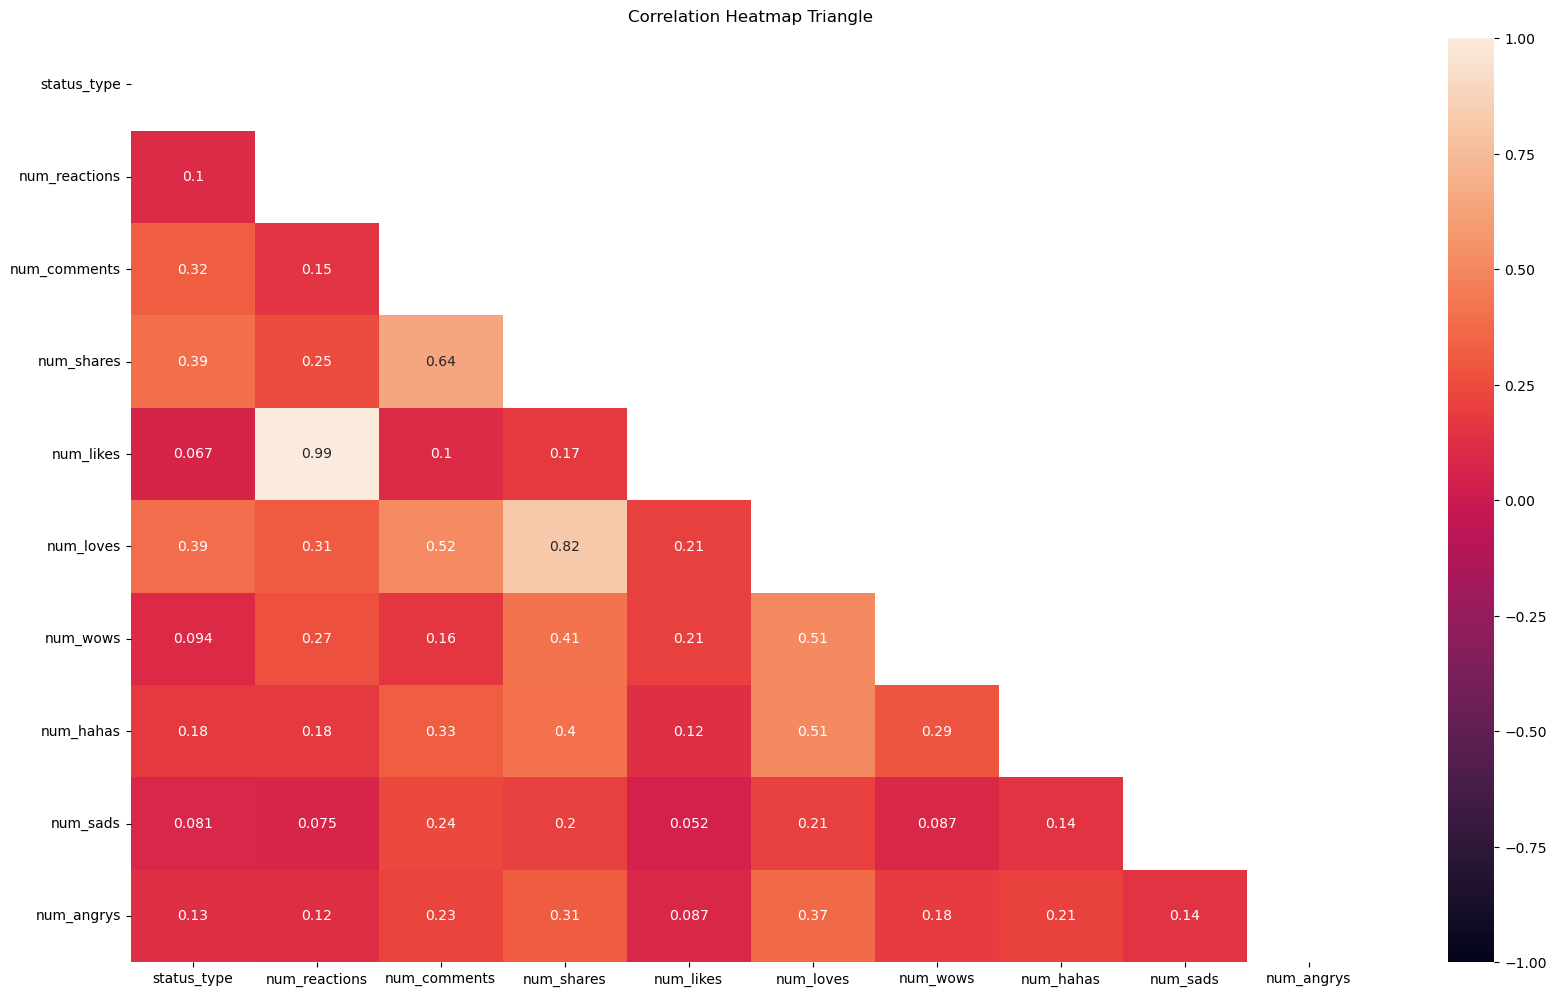

In [13]:
plt.figure(figsize=(20, 12))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, mask= np.triu(df.corr()))
heatmap.set_title('Correlation Heatmap Triangle', fontdict={'fontsize':12}, pad=12);

In [14]:
df = df.drop(['status_published'], axis=1)
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


In [15]:
df_columns = df.columns

In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df_columns)
scaled_df 

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.374288,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748
1,-0.748106,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
2,1.374288,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748
3,-0.748106,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
4,-0.748106,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748
...,...,...,...,...,...,...,...,...,...,...
7045,-0.748106,-0.305057,-0.252206,-0.304144,-0.280445,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748
7046,-0.748106,-0.462863,-0.252206,-0.304144,-0.447319,-0.293436,-0.147879,0.076713,-0.152587,-0.155748
7047,-0.748106,-0.493128,-0.252206,-0.304144,-0.476244,-0.293436,-0.147879,-0.176010,-0.152587,-0.155748
7048,-0.748106,0.261316,-0.238717,-0.136959,0.298053,-0.268417,-0.147879,-0.176010,-0.152587,-0.155748


Apliquem PCA (Principal Component Analysis) per a reduir el nombre de columnes

C:\Users\ingbg\AppData\Local\Temp\ipykernel_5312\2823438706.py:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,5,1)


Text(0, 0.5, 'Cumulative explained variance')

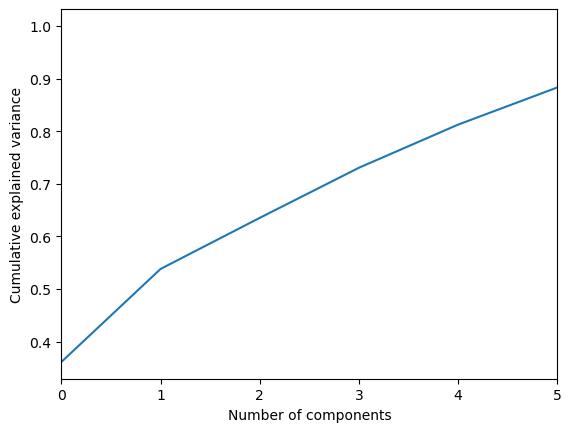

In [17]:
pca = PCA().fit(scaled_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,5,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Ens quedarem amb les dues primeres components

In [18]:
pca = PCA(n_components=2)

Xpca = pca.fit_transform(scaled_df)
Xpca

array([[ 2.5405094 , -0.23607406],
       [-0.79803786,  0.13585119],
       [ 0.43762738, -0.29557191],
       ...,
       [-0.95900706, -0.28541071],
       [-0.46331428,  0.65600489],
       [-0.95260225, -0.23812599]])

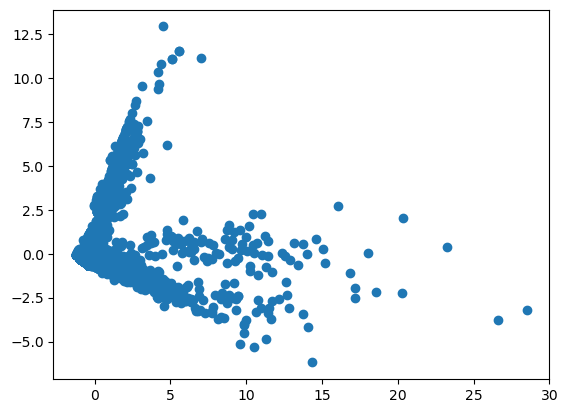

In [19]:
fig, ax = plt.subplots()
ax.scatter(x=Xpca[:,0], y=Xpca[:,1])   

In [20]:
col = list(df.columns)
attributes_pca = pd.DataFrame({'Attribute' : col, 'PC_1': pca.components_[0], 'PC_2': pca.components_[1]})
attributes_pca.style.highlight_max(['PC_1', 'PC_2'])

,Attribute,PC_1,PC_2
0,status_type,0.244297,-0.174958
1,num_reactions,0.286301,0.624803
2,num_comments,0.349168,-0.225759
3,num_shares,0.444831,-0.190033
4,num_likes,0.244151,0.656723
5,num_loves,0.462474,-0.145717
6,num_wows,0.294638,0.047012
7,num_hahas,0.309000,-0.117216
8,num_sads,0.162429,-0.107653
9,num_angrys,0.237465,-0.108961


In [21]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(Xpca)

y_pred = kmeans.predict(Xpca)

Text(0.5, 1.0, 'VISUALIZATION OF CLUSTERS')

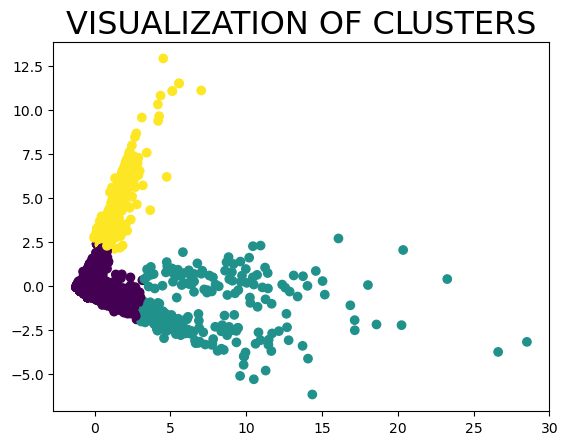

In [22]:
fig, ax = plt.subplots()
ax.scatter(x=Xpca[:,0], y=Xpca[:,1], c=y_pred)
plt.title('VISUALIZATION OF CLUSTERS', fontsize = 23)

Text(0.5, 1.0, 'VISUALIZATION OF CLUSTERS')

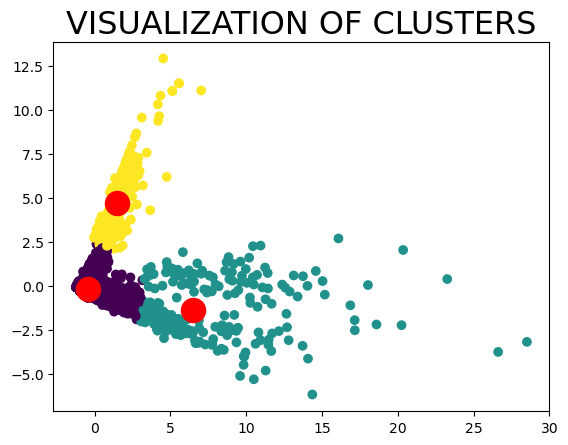

In [23]:
fig, ax = plt.subplots()
ax.scatter(x=Xpca[:,0], y=Xpca[:,1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('VISUALIZATION OF CLUSTERS', fontsize = 23)

In [24]:
df['Cluster'] = y_pred
df.Cluster.unique()

array([0, 1, 2])

In [25]:
df.groupby(['Cluster'])[['num_comments','num_shares']].agg(['count', np.mean, max, min]).round(2)    

num_comments                     num_shares                  
               count     mean    max min      count    mean   max min
Cluster                                                              
0               6349    92.44   4487   0       6349   19.24   496   0
1                330  2945.32  20990   3        330  471.56  3424   0
2                371    61.67   1186   0        371   11.79   257   0

Text(0.5, 1.0, 'Histogram of clusters')

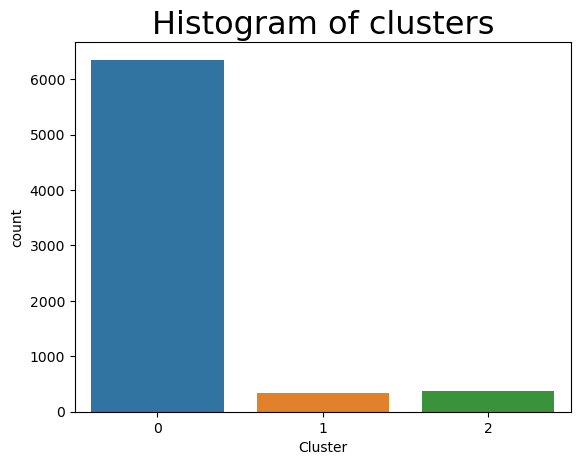

In [26]:
pl = sns.countplot(x=df['Cluster'])
pl.set_title("Histogram of clusters", fontsize = 23)

Clarament el cluster 0 és el més nombrós respecte els altres

## - Exercici 2

Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

In [30]:
df_jerarquic = scaled_df.sample(frac=.20, random_state=7) #reduïm el dataset al 20%
df_jerarquic.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
status_type,1410.0,0.04,1.01,-1.81,-0.75,-0.75,1.37,1.37
num_reactions,1410.0,0.04,1.10,-0.50,-0.46,-0.36,-0.01,9.68
num_comments,1410.0,-0.02,0.82,-0.25,-0.25,-0.25,-0.23,10.80
num_shares,1410.0,-0.01,0.87,-0.30,-0.30,-0.30,-0.27,8.06
num_likes,1410.0,0.04,1.11,-0.48,-0.44,-0.34,-0.06,10.00
num_loves,1410.0,-0.00,0.98,-0.32,-0.32,-0.32,-0.24,11.74
num_wows,1410.0,-0.02,0.64,-0.15,-0.15,-0.15,-0.15,13.84
num_hahas,1410.0,0.01,0.89,-0.18,-0.18,-0.18,-0.18,25.60
num_sads,1410.0,-0.00,0.73,-0.15,-0.15,-0.15,-0.15,14.25
num_angrys,1410.0,0.06,1.61,-0.16,-0.16,-0.16,-0.16,42.50


In [32]:
pca = PCA(n_components=2)
df_jerarquic_pca = pca.fit_transform(df_jerarquic)

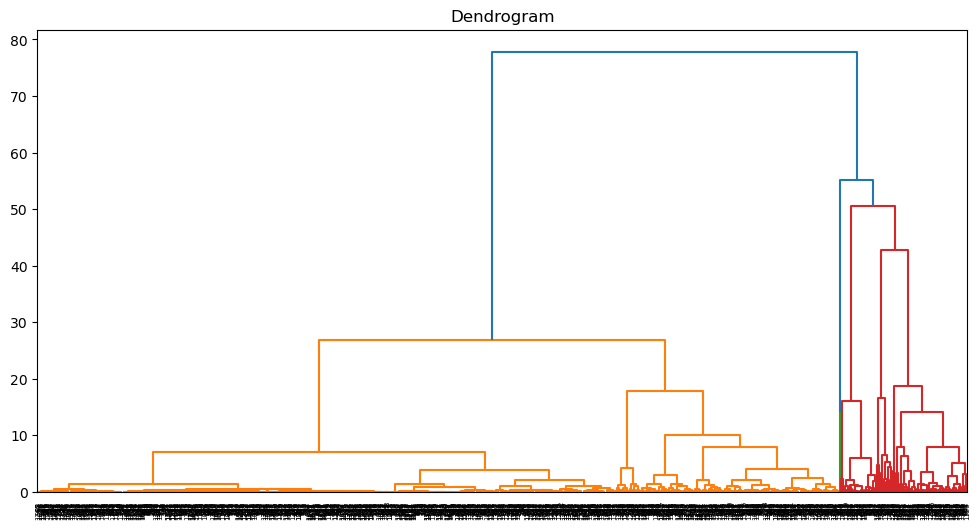

In [42]:
plt.figure(figsize=(12, 6))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(df_jerarquic_pca, method='ward'))

In [60]:
agg_cl = AgglomerativeClustering(n_clusters=3)
agg_cl.fit_predict(df_jerarquic_pca)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Text(0.5, 1.0, 'VISUALIZATION OF CLUSTERS')

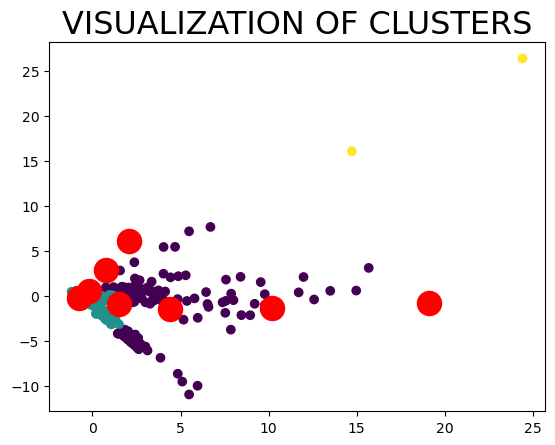

In [61]:
fig, ax = plt.subplots()
ax.scatter(x=df_jerarquic_pca[:,0], y=df_jerarquic_pca[:,1], c=agg_cl.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('VISUALIZATION OF CLUSTERS', fontsize = 23)

In [62]:
df_jerarquic['Cluster']=agg_cl.labels_
df_jerarquic.Cluster.unique()

array([1, 0, 2], dtype=int64)

Text(0.5, 1.0, 'Histogram of clusters')

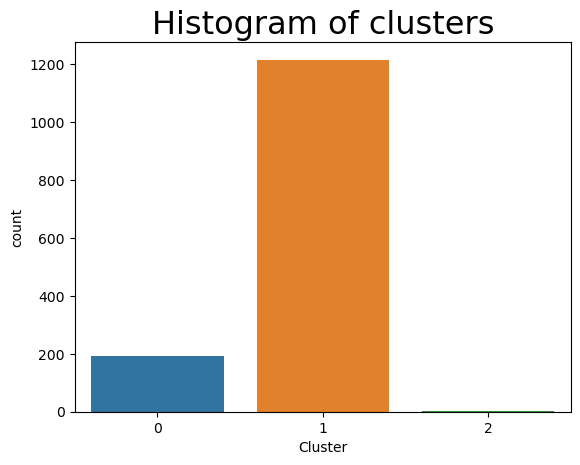

In [63]:
pl = sns.countplot(x=df_jerarquic['Cluster'])
pl.set_title("Histogram of clusters", fontsize = 23)

In [64]:
print("Entrenament Hierarchical clustering")
print('\n')
df_jerarquic.groupby(['Cluster'])[['num_comments','num_shares']].agg(['count', np.mean, max, min]).round(2)

Entrenament Hierarchical clustering




num_comments                    num_shares                 
               count  mean    max   min      count  mean   max  min
Cluster                                                            
0                192  1.11  10.80 -0.25        192  1.33  8.06 -0.3
1               1216 -0.19   2.72 -0.25       1216 -0.23  2.12 -0.3
2                  2 -0.21  -0.20 -0.22          2 -0.29 -0.27 -0.3

In [65]:
print("Entrenament K-Means")
print('\n')
df.groupby(['Cluster'])[['num_comments','num_shares']].agg(['count', np.mean, max, min]).round(2)

Entrenament K-Means




num_comments                     num_shares                  
               count     mean    max min      count    mean   max min
Cluster                                                              
0               6349    92.44   4487   0       6349   19.24   496   0
1                330  2945.32  20990   3        330  471.56  3424   0
2                371    61.67   1186   0        371   11.79   257   0

Un resultat molt similiar a l'anterior, on hi ha un cluster que domina respecte els atres.

## - Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [66]:
silouette_coefficients = []

for k in range(2, 11):
  model = KMeans(n_clusters=k)
  model.fit(Xpca)
  score = silhouette_score(Xpca, model.labels_)
  silouette_coefficients.append(score)

Text(0, 0.5, 'coefficient')

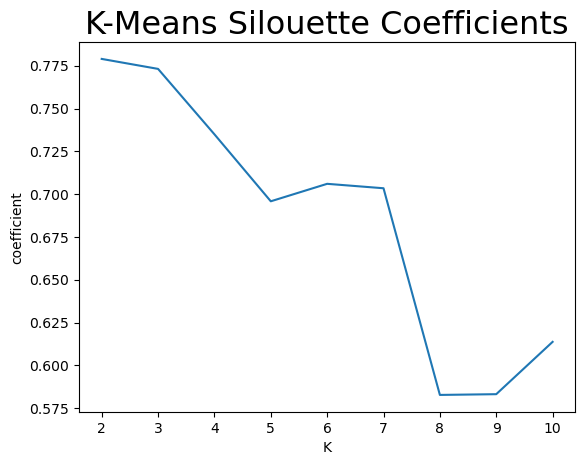

In [67]:
fig, ax = plt.subplots()
ax.plot(range(2, 11), silouette_coefficients)
plt.title('K-Means Silouette Coefficients', fontsize = 23)
plt.xlabel('K') 
plt.ylabel('coefficient') 

In [68]:
silouette_coefficients = []

for k in range(2, 11):
  agg_cl = AgglomerativeClustering(n_clusters=k)
  agg_cl.fit_predict(df_jerarquic_pca)
  score = silhouette_score(df_jerarquic_pca, agg_cl.labels_)
  silouette_coefficients.append(score)

Text(0, 0.5, 'coefficient')

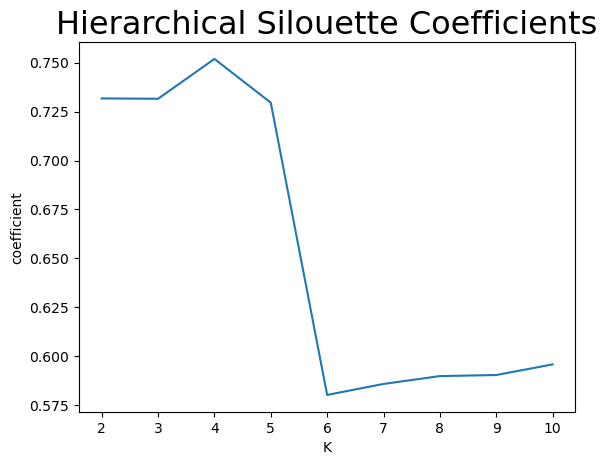

In [69]:
fig, ax = plt.subplots()
ax.plot(range(2, 11), silouette_coefficients)
plt.title('Hierarchical Silouette Coefficients', fontsize = 23)
plt.xlabel('K') 
plt.ylabel('coefficient') 

Segons ambdós models s'observa que el número òptim de cluster que s'hauria d'escollir és 2 o 3.

In [74]:
!pip install kneed
from kneed import DataGenerator, KneeLocator

In [75]:
inertia = []
for n in range (1,9): 
    kmeans = KMeans(n_clusters= n, random_state=42)
    kmeans.fit(Xpca)
    inertia.append(kmeans.inertia_)

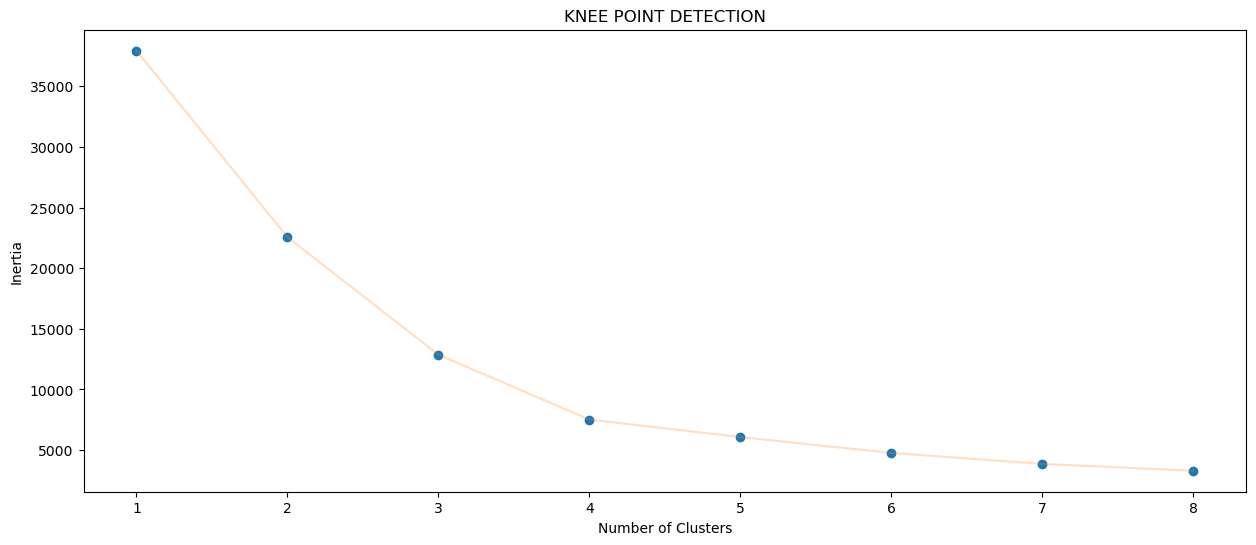

In [76]:
plt.figure(figsize= (15,6))
plt.plot(np.arange(1 , 9) , inertia , 'o')
plt.plot(np.arange(1 , 9) , inertia , '-' , alpha = 0.25)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.title('KNEE POINT DETECTION');

In [77]:
kn = KneeLocator(x=list(range (1,9)), y=inertia, curve='convex', direction='decreasing')
kn.knee

4

Encanvi segons Knee Point el número òptim de clusters hauria de ser 4.